In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### tables


In [216]:
protein_one = pd.read_csv('/Users/jonathanfarro/Desktop/animal-protein-consumption.csv')

life_ex = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/life-expectancy-hmd-unwpp.csv')

usa_pricing = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/average_prices_for_food.csv')

daily_cals = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv')

fruit_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/fruit-consumption-per-capita.csv')

veg_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/vegetable-consumption-per-capita/vegetable-consumption-per-capita.csv' )

vitamins =  pd.read_excel('/Users/jonathanfarro/Desktop/ Capstone Files/food_comp.xlsx')

protein_per_GDP = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-per-capita-protein-supply-vs-gdp-per-capita.csv')




### cleaning

In [218]:
# rename columns to something easier to work with 

protein = protein_one.rename(columns={
                        protein_one.columns[3]:'fish',
                        protein_one.columns[4]:'poultry',
                        protein_one.columns[5]:'pork',
                        protein_one.columns[6]:'beef',
                        protein_one.columns[7]:'sheep/goat',
                        protein_one.columns[8]:'other',
                        protein_one.columns[9]:'eggs',
                        protein_one.columns[10]:'milk'
                       })


In [257]:
# bulk clean up 
protein = protein.rename(columns=lambda x: x.lower())
protein = protein.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)

life_ex = life_ex.rename(columns = lambda x: x.lower())
life_ex = life_ex.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
life_ex = life_ex.rename(columns = {life_ex.columns[3] : 'life_expectancy(0)'})

vitamins = vitamins.rename(columns = lambda x: x.lower())
vitamins = vitamins.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

protein_per_GDP = protein_per_GDP.rename(columns = lambda x: x.lower())
protein_per_GDP = protein_per_GDP.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
gdp_population = protein_per_GDP.drop(columns= {protein_per_GDP.columns[3],protein_per_GDP.columns[6]})
gdp_population = gdp_population.rename(columns = { gdp_population.columns[3]: 'gdp_per_capita'}) 



daily_cals = daily_cals.rename(columns = lambda x: x.lower())
daily_cals = daily_cals.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)



In [220]:
# creating a new column to show total_protein intake for a day.
protein['total_protein'] = protein.iloc[:, 3:11].sum(axis = 1).round(2)
protein['total_yearly_protein'] = (protein['total_protein'] * 365).round()
protein.head()


,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,total_yearly_protein
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,6.346136,12.43,4537.0
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,6.268587,12.37,4515.0
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,6.813153,13.09,4778.0
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,6.857546,13.22,4825.0
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,7.319804,13.82,5044.0


In [221]:
fruit_per_cap = fruit_per_cap.rename(columns=lambda x: x.lower())
fruit_per_cap = fruit_per_cap.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
#fruit_per_cap.head()
fruit = fruit_per_cap.rename(columns = {fruit_per_cap.columns[3]:'fruit_kilo_yearly'}).reset_index(drop = True)

In [222]:
world_protein = protein.loc[protein['entity']== "world"]
world_protein = world_protein.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
world_protein.head()


,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,total_yearly_protein
0,world,owid_wrl,1961,2.661997,1.042947,2.165356,3.595682,0.685365,0.407246,1.370730,6.724522,18.65,6807.0
1,world,owid_wrl,1962,2.790629,1.072555,2.244420,3.724149,0.695175,0.407174,1.380418,6.693537,19.01,6939.0
2,world,owid_wrl,1963,2.881373,1.099080,2.376390,3.822027,0.673311,0.396065,1.366424,6.762810,19.38,7074.0
3,world,owid_wrl,1964,2.863391,1.115735,2.389451,3.791525,0.661542,0.394951,1.392201,6.694412,19.30,7044.0
4,world,owid_wrl,1965,2.997417,1.183191,2.534001,3.796071,0.650755,0.384537,1.400109,6.566710,19.51,7121.0


In [225]:
#In essence, this code helps you understand the minimum 'total_protein' values observed in years where 'protein' consumption was at its lowest

In [230]:
protein.groupby(['year','entity']).agg({'total_protein': 'min'}).head()


total_protein
year entity                     
1961 afghanistan           12.43
     africa                 9.50
     africa (fao)           9.84
     albania               16.54
     algeria               10.29

In [232]:
#loop to classify food groups? 

In [235]:
fruit_protein = pd.merge(protein,fruit, on = ['entity','code','year'],how= 'inner')

In [237]:
veg = veg_per_cap.rename(columns=lambda x: x.lower())
veg = veg.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
veg = veg.rename(columns = {veg.columns[3]:'veg_kilo_yearly'})

In [239]:
all_foods = pd.merge(fruit_protein, veg, on = ['entity','code','year'],how= 'inner')


In [241]:
all_foods['fruit_grams_daily'] = (all_foods['fruit_kilo_yearly'] * 1000/365).round()
all_foods['veg_grams_daily']   = (all_foods['veg_kilo_yearly'] * 1000/365).round()
 

In [243]:
#shows that pork is skipped for religious reasons


In [245]:
all_foods.isnull().sum()

entity                     0
code                    2619
year                       0
fish                       0
poultry                    0
pork                     328
beef                       0
sheep/goat                 0
other                      7
eggs                       0
milk                       0
total_protein              0
total_yearly_protein       0
fruit_kilo_yearly          0
veg_kilo_yearly            0
fruit_grams_daily          0
veg_grams_daily            0
dtype: int64

In [247]:
all_foods.head()

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,total_yearly_protein,fruit_kilo_yearly,veg_kilo_yearly,fruit_grams_daily,veg_grams_daily
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,6.346136,12.43,4537.0,41.896720,37.435070,115.0,103.0
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,6.268587,12.37,4515.0,38.732730,38.192513,106.0,105.0
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,6.813153,13.09,4778.0,39.012444,39.644800,107.0,109.0
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,6.857546,13.22,4825.0,48.900833,40.992203,134.0,112.0
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,7.319804,13.82,5044.0,49.707287,41.683067,136.0,114.0


<Axes: xlabel='year', ylabel='total_protein'>

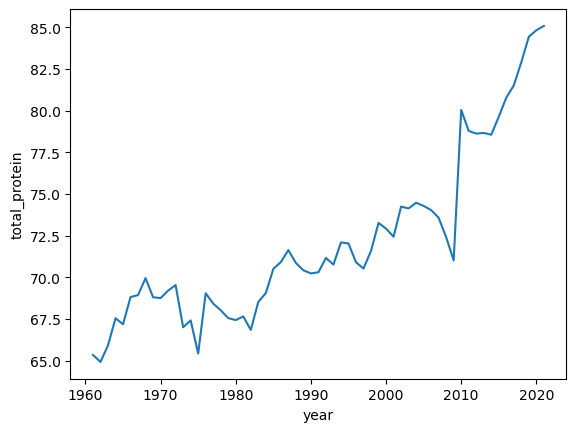

In [249]:
us_food_choices = all_foods.loc[all_foods['entity']=='united states']
sns.lineplot(us_food_choices, x = 'year', y = 'total_protein')

<Axes: >

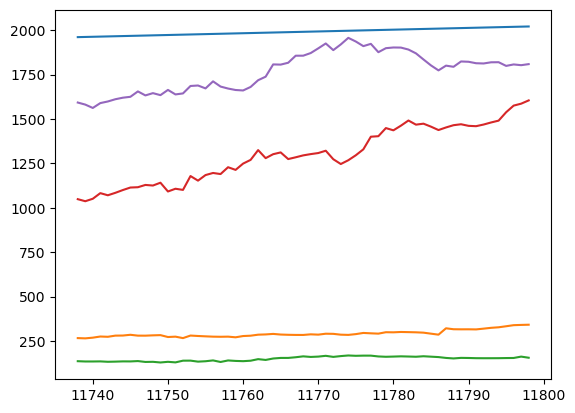

In [251]:
  daily_cals.loc[daily_cals['entity']=='united states'].plot(legend = False)

In [253]:
usa_life_ex = life_ex.loc[life_ex['entity'] == 'united states']

<Axes: xlabel='year', ylabel='life_expectancy(0)'>

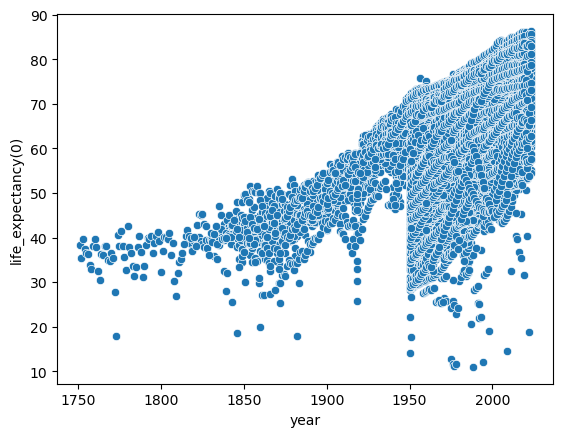

In [283]:
sns.scatterplot(life_ex,x='year',y='life_expectancy(0)')

In [285]:
all_foods.head()

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,total_yearly_protein,fruit_kilo_yearly,veg_kilo_yearly,fruit_grams_daily,veg_grams_daily
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,6.346136,12.43,4537.0,41.896720,37.435070,115.0,103.0
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,6.268587,12.37,4515.0,38.732730,38.192513,106.0,105.0
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,6.813153,13.09,4778.0,39.012444,39.644800,107.0,109.0
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,6.857546,13.22,4825.0,48.900833,40.992203,134.0,112.0
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,7.319804,13.82,5044.0,49.707287,41.683067,136.0,114.0


<Axes: xlabel='year', ylabel='veg_grams_daily'>

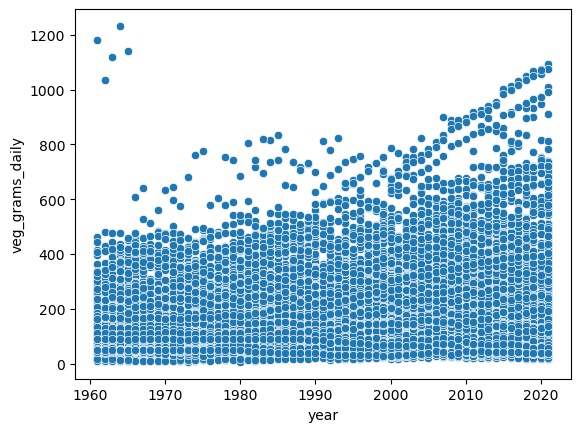

In [287]:
sns.scatterplot(all_foods,x='year',y='veg_grams_daily')

In [279]:
all_foods[['year','milk']].corr()

,year,milk
year,1.000000,0.135569
milk,0.135569,1.000000
